### 7CCSMCMP (Computer Programming)
# Coursework 3 
# DUE ON KEATs BY SUNDAY 18th December by 23:55pm
This is the third programming assigment for this module.  It covers the three specialty areas of python packages that we have covered in the last weeks of lecture: *geographic analysis*, *network analysis*, and *natural language processing*.

- It is worth 5% of your final grade.  
- Do your work for this assignment in the cells of this jupyter notebook.  You should be able to fit the code required for this assignment in this notebook.
- This notebook comes with a ```data/``` directory that holds the assignment data for this exercise.
- You must do ***your own work***, there is no ***collaborating*** allowed.
- Make sure that you properly ```comment``` your code, so that the grader can understand what your program is doing.  ***Uncommented code will result in loss of marks!***

## Your Details
Edit this Markdown cell with:

- *Sari Nusier*
- *1317015*

## The Data: Tweets collected over 48 hours Geolocated in the USA

In this coursework, you will be exploring this collection of tweets. In the ```data/``` directory you will find a ```tweets.csv``` containing the tweets data. These tweets are all identified as being in english.

Here are descriptions of a few fields that will be useful for you:


Name | Description
--- | ---
Tweet Id | unique tweet id
Date | 
Hour | 
User Name | 
Nickname | the @name of the tweet
Bio |  
Tweet content |  The text of the tweet
Favs |  
RTs |  Number of retweets for the tweet
Latitude |  
Longitude |  
Country |  
Place (as appears on Bio) | 
Profile |  
picture |  
Followers |  
Following |  
favorited |  
Listed |  
Tweet language (ISO 639-1) |  
Tweet Url |  
 

Answer each of the questions below, and include a short explanation for each answer or plot that you generate (use a Markdown cell to write your explanation).

## Part 1: Geographic

Use the geographic python package ```geopandas``` to answer these questions.

For these questions, downland and add this Shapefile for the United States to your ```data/``` directory:
https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5

**Question 1.1 [10 points]** 

What percentage of the Tweets from this dataset fall within the 50 states (including Alaska, Hawaii, and DC) of the US?

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tweets = pd.read_csv("data/tweets.csv")

# all the tweets in the US
total_US_tweets = float(len(tweets[tweets.Country == 'US']))

# all the tweets
total_tweets = float(len(tweets))

# Calcuating the percentage and printing it
perc_US_tweets = (total_US_tweets/total_tweets)*100
print perc_US_tweets

87.1531100478


**Question 1.2 [10 points]** 

For those Tweets that are within the US boundaries, create a *cloropleth* map of the ***United States*** showing the number of Tweets per State (treat DC as a state in this case).  Include a legend showing the color scale for the number of Tweets.

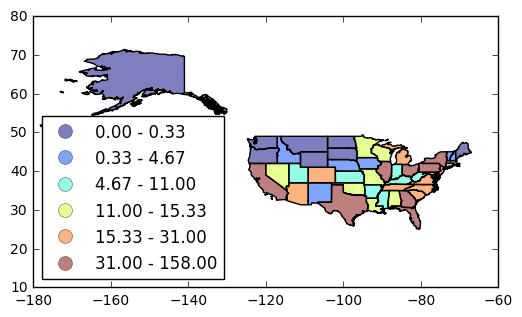

In [7]:
# reading the shape file
US = gpd.read_file("data/states.shp")

#dictionaries will be used to calculate total
tweets_per_state_dict = {}
retweets_per_state_dict = {}

# choosing only the tweets in US. 
# We choose a sample of only 10000 tweets to reduce computation time.
tweets_US = tweets[tweets['Country'] == "US"].sample(1000)

# We will calculate both total tweets and total retweets in the same for loop (for both 1.2 and 1.3)
for state in US['STATE_ABBR']:
    # initialise total with 0
    tweets_per_state_dict[state] = 0
    retweets_per_state_dict[state] = 0
    # getting the polygon of the current state
    cur_state_geom = US[US.STATE_ABBR == state].geometry
    
    # we iterate through all tweets in the US
    for index, row in tweets_US.iterrows():
        # Checking if the Coordinates of the tweet are within the state polygon.
        # If true, that means the tweet belongs to the state
        if cur_state_geom.intersects(Point(row['Longitude'],row['Latitude'])).all():
            # We increment total number of tweets and at the same time add the number of 
            # retweets to the total retweets of that state
            retweets_per_state_dict[state] += np.nan_to_num(row['RTs'])
            tweets_per_state_dict[state] += 1
            # We drop the tweet (row from dataframe) in order to reduce the size of the next loops.
            # Once tweets were identified to belong to a state, there is no reason to check them again.
            tweets_US.drop(index, inplace=True)

# We add two new columns to the geopandas dataframe containing the total tweets and retweets
# the lambda expression helps us access the value from the dictionary and attach it to its
# corresponding state.
US['TOTAL_TWEETS'] = US.apply(lambda row: tweets_per_state_dict[row['STATE_ABBR']], axis = 1)
US['TOTAL_RETWEETS'] = US.apply(lambda row: retweets_per_state_dict[row['STATE_ABBR']], axis = 1)

# We plot the map of total tweets.
# The map of retweets will be plotted in the next cell
US.plot(column='TOTAL_TWEETS', scheme='QUANTILES', k = 6, legend=True)

**Question 1.3 [10 points]** 

Create a *cloropleth* map of the ***United States*** showing the total sum of retweets for the Tweets per state (and DC).  Include a legend showing the color scale for the number of Retweets.

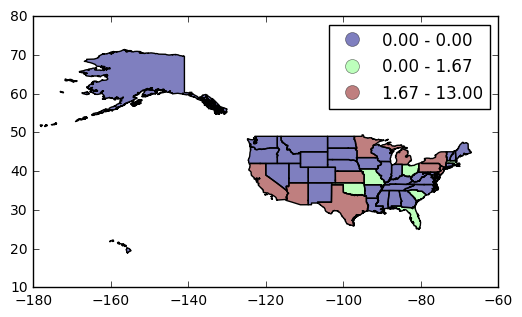

In [8]:
# Plotting works
US.plot(column='TOTAL_RETWEETS', scheme='QUANTILES', k = 6, legend=True)

**Question 1.4 [10 points]** 

Find the top 3 states with the *highest density* of Tweets (from the dataset) per area.  

In [9]:

# We calculate the density and add it to the dataframe
US['TWEET_DENSITY'] = US.apply(lambda row: row['TOTAL_TWEETS']/row['geometry'].area, axis = 1)

# We print the state abbreviation of the highest three states by density
print US.sort_values('TWEET_DENSITY', ascending=False)['STATE_ABBR'].head(3)

27    DC
20    NJ
19    RI
Name: STATE_ABBR, dtype: object


## Part 2 [NLP]

This data contains the text of the tweet (in the 'tweet content' column of the tweets.csv provided). In this section we will be focusing on this column.

**Question 2.1 [10 points]** 

Load the 'Tweet content' column into NLTK. 

Make sure that when you read in the .csv you use the following syntax:


```all=pd.read_csv('tweets.csv', encoding='iso-8859-1')```

This encoding will ensure that the text is read in clean of strange symbols.

Show your code and document it, ensuring that you have produced an NLTK.Text.text object. 

In [11]:
import nltk
# nltk.download() # install missing resources (punkt)


try:
    # Loading all tweets from csv file into a pandas df
    tweets = pd.read_csv('data/tweets.csv', encoding='iso-8859-1')

    # Selecting only the content column
    tweets_content = tweets['Tweet content']

    #convert to string, tokenize and loading into a text object.
    tweets_string = tweets_content.to_string(index = False)
    tweets_nltk = nltk.word_tokenize(tweets_string)
    tweets_nltk=nltk.Text(tweets_nltk)

    # We print the type to make sure that the right object was created
    print type(tweets_nltk) # Outputs nltk.text.Text
    
except IOError:
    print("File is missing.")

<class 'nltk.text.Text'>


** Question 2.2 [10 points] **

Use the object in Question 2.1 to calculate the 50 most frequent words.

In [12]:
# we first calculate the frequency distribution
tweets_fdist = nltk.FreqDist(tweets_nltk)

# We find most common 50
t_most_common_50 = tweets_fdist.most_common(50)
print t_most_common_50

[(u'...', 200529), (u'#', 172225), (u'@', 63208), (u',', 49469), (u':', 49260), (u'in', 39233), (u'!', 38919), (u'at', 27820), (u'a', 27229), (u'I', 25314), (u'to', 24843), (u'https', 21061), (u'.', 20468), (u'the', 19652), (u'job', 19601), (u'(', 18057), (u'for', 17513), (u'you', 15889), (u"'m", 15284), (u'our', 15131), (u'?', 14865), (u'-', 12655), (u"'re", 12439), (u'this', 11627), (u'Job', 11606), (u'We', 11499), (u'and', 11220), (u'latest', 11048), (u"'s", 9844), (u'hiring', 8839), (u'of', 8824), (u'on', 8353), (u'work', 7955), (u'Can', 7736), (u'anyone', 7645), (u'recommend', 7577), (u'Want', 7180), (u'See', 6984), (u'my', 6737), (u'_', 6721), (u'The', 6279), (u')', 6015), (u'with', 5933), (u'is', 5883), (u'be', 5775), (u';', 5412), (u'This', 5400), (u'&', 5239), (u'Retail', 4802), (u'de', 4604)]


** Question 2.3 [5 points]**

Plot a cumulative frequency distribution of the most frequent words.

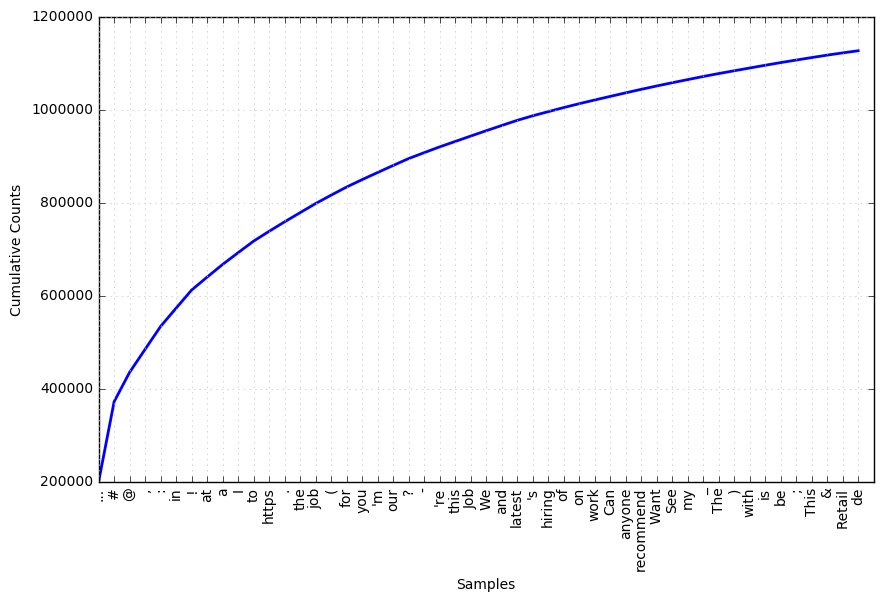

In [13]:
# setting size
plt.figure(figsize=(10,6))

# plotting
tweets_fdist.plot(50, cumulative = True)

** Question 2.4 [5 points] **

Find and print the collocations in the tweet content.

In [16]:
#nltk.download() # download all-corpora

#show collocations
tweets_nltk.collocations()

recommend anyone; great fit; job might; ... ...; job near; job open;
... Want; Job alert; ... Interested; New York; open ...; ... Join; //t
...; CVS Health; SONIC Drive-In; ... See; Health Care; http ...; htt
...; Los Angeles


## Part 3 [Graphs]


In this section we are going to focus on the connections between different hashtags, and treat them as a graph in order to visualise the relationships between hashtags that occur together.

** Question 3.1 [5 points]**

The file coachella_hashtags.csv contains a sample of the tweets that have the #coachella in them. This is a small sample of tweets with the #coachella and which have at least one more # in them. These hashtags have been extracted to separate columns: tag1, tag2, tag3.

Read this data in and using tag1 and tag2 load this data into a networkX Graph object and draw the graph. Use apropriate options and colors.

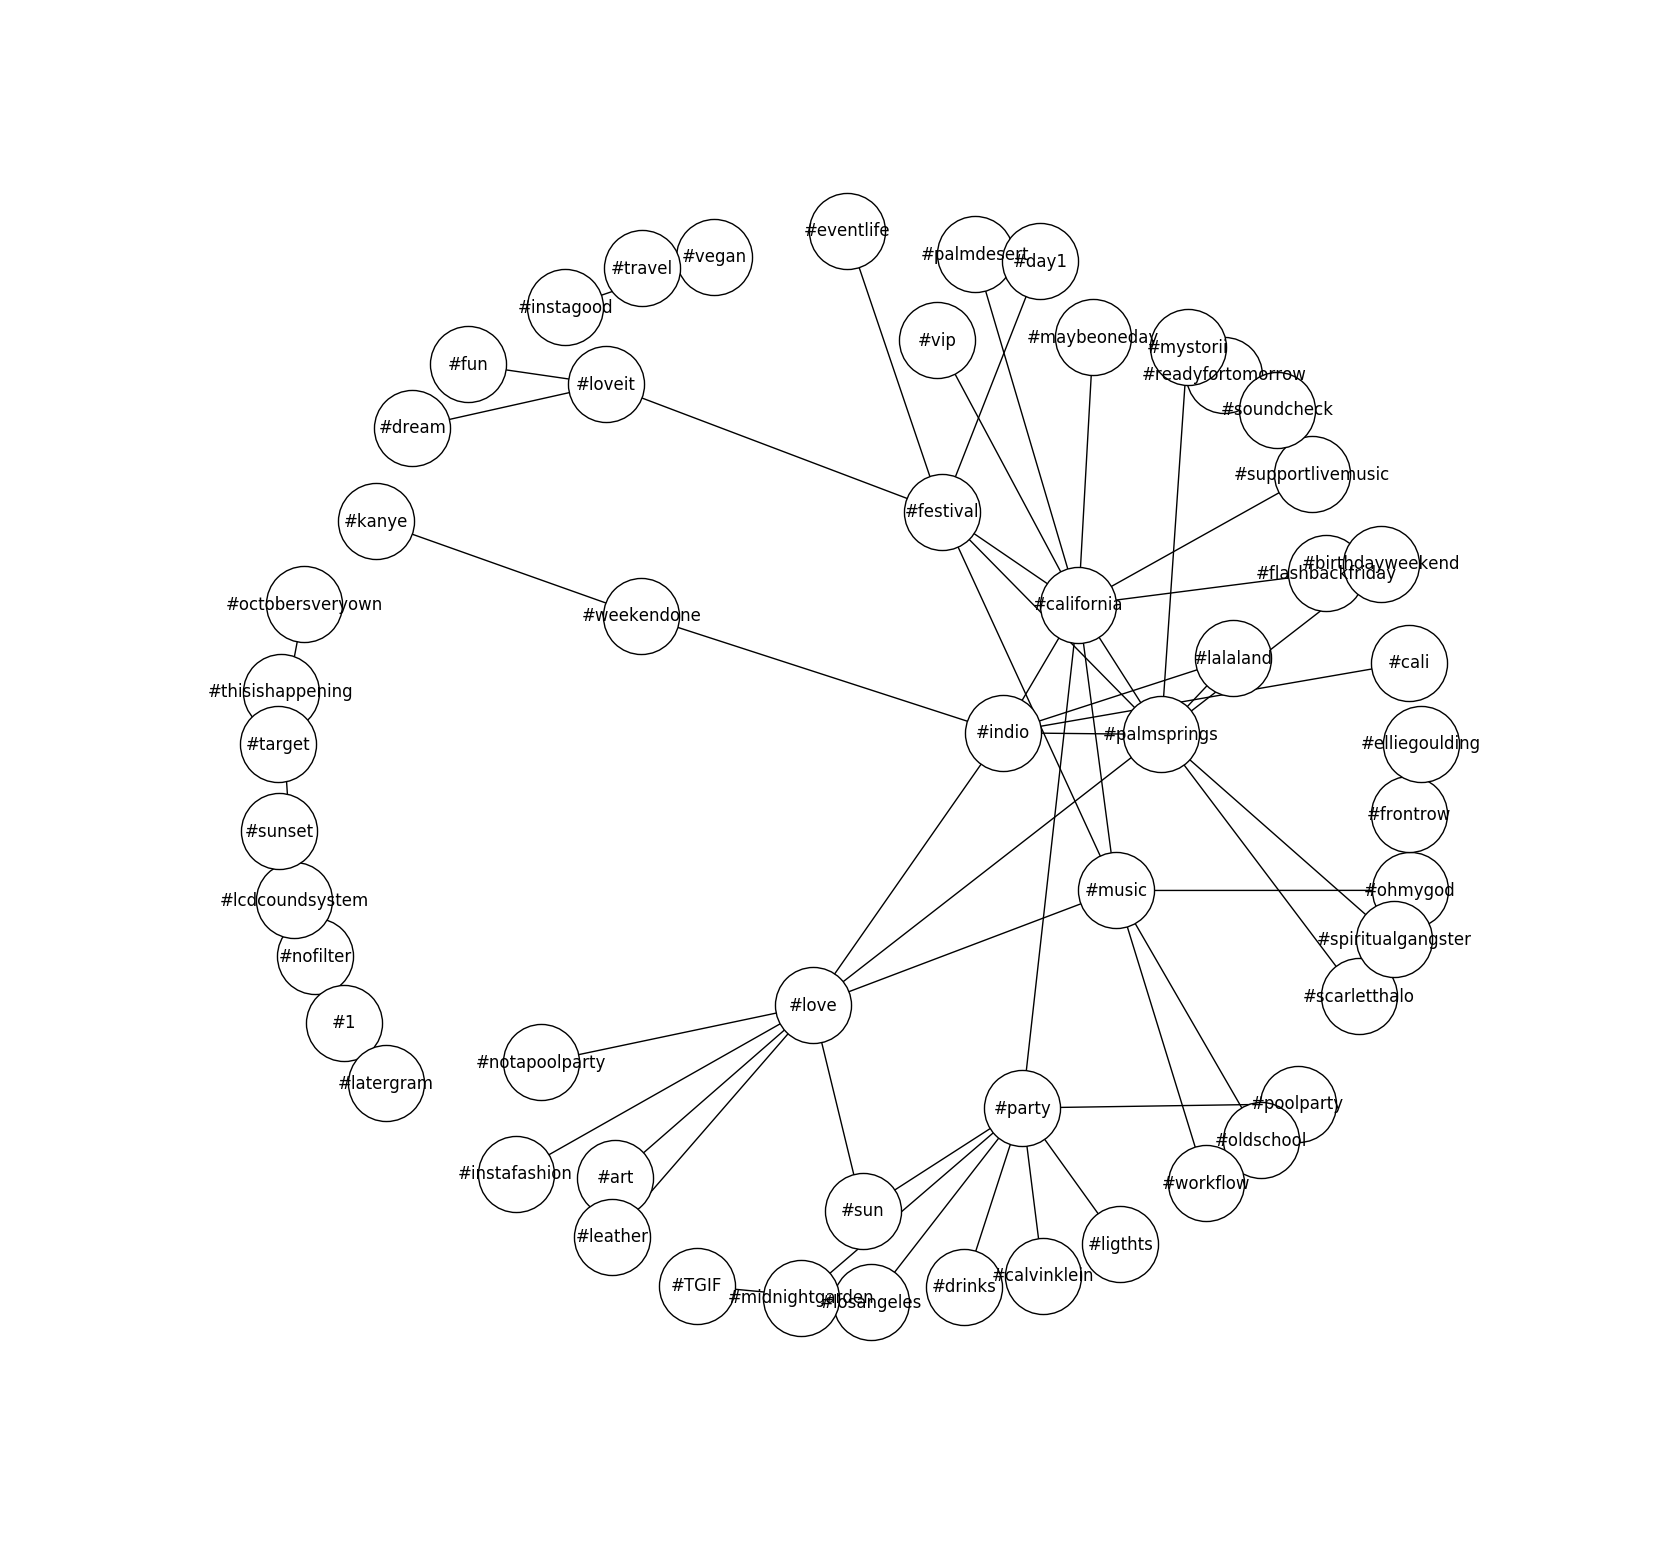

In [27]:
import networkx as nx

try:
    # getting the data
    tweets = pd.read_csv('data/coachella_hashtags.csv')
    
    # creating and drawing the graph
    tweetsgraph = nx.from_pandas_dataframe(tweets, 'tag1', 'tag2', create_using = nx.Graph())
    plt.figure(figsize = (16,15))
    nx.draw(tweetsgraph, with_labels=True, node_size=3000, node_color="white")
    
except IOError:
    print "file not found"

** Question 3.2 [10 points] **

Using the graph created in 3.1 provide the following information about the graph:

- Numeber of nodes and number of edges
- The nodes connected to ```#lcdcoundsystem``` (***updated***)
- The node with the highest clustering measure
- The node with the highes closeness centrality measure
- Find the ***cliques*** of the network (***updated***)

In [28]:
# number of nodes
print "Total number of nodes: %i\n" % tweetsgraph.number_of_nodes()

# number of edges
print "Total number of edges: %i\n" % tweetsgraph.number_of_edges()

# degree of #lcdcoundssystem
print "Degree of #lcdcoundssystem: %i\n" % tweetsgraph.degree('#lcdcoundsystem')

# node with highest clustering coefficient
import operator
print "Highest clustering coefficient"
clust_dict = nx.clustering(tweetsgraph)
print max(clust_dict.iteritems(), key=operator.itemgetter(1))
print ""

# Highest closeness centrality
print "Highest closeness centrality"
clust_dict = nx.closeness_centrality(tweetsgraph)
print max(clust_dict.iteritems(), key=operator.itemgetter(1))
print ""

# Cliques of the network
print "Cliques:"
print list(nx.find_cliques(tweetsgraph))

Total number of nodes: 55

Total number of edges: 55

Degree of #lcdcoundssystem: 3

Highest clustering coefficient
('#lalaland', 1.0)

Highest closeness centrality
('#california', 0.37061403508771934)

Cliques:
[['#nofilter', '#sunset'], ['#poolparty', '#party'], ['#vegan', '#travel'], ['#vegan', '#instagood'], ['#art', '#love'], ['#1', '#lcdcoundsystem'], ['#kanye', '#weekendone'], ['#thisishappening', '#lcdcoundsystem'], ['#cali', '#indio'], ['#readyfortomorrow', '#soundcheck'], ['#calvinklein', '#party'], ['#lcdcoundsystem', '#latergram'], ['#loveit', '#fun'], ['#loveit', '#festival'], ['#loveit', '#dream'], ['#birthdayweekend', '#palmsprings'], ['#california', '#maybeoneday'], ['#california', '#music', '#festival'], ['#california', '#palmsprings', '#indio'], ['#california', '#palmsprings', '#festival'], ['#california', '#vip'], ['#california', '#flashbackfriday'], ['#california', '#party'], ['#california', '#palmdesert'], ['#california', '#supportlivemusic'], ['#scarletthalo', '#p

** Question 3.3 [5 points]**

Some of the tag1 and tag2 combinations occur more than once in this sample of data. 

Load the data into a MultiGraph object and provide the following information about the MultiGraph:
- Number of nodes
- Number of edges

In [30]:
try:
    # similar to 3.1 but we use nx.MultiGraph to create the graph
    tweets = pd.read_csv('data/coachella_hashtags.csv')
    tweetsgraph = nx.from_pandas_dataframe(tweets, 'tag1', 'tag2', create_using = nx.MultiGraph())
    print "Number of nodes: %i" % tweetsgraph.number_of_nodes()
    print "Number of edges: %i" % tweetsgraph.size()
except IOError:
    print "file not found"

Number of nodes: 55
Number of edges: 62


** Question 3.4 [10 points] **

The coachella_hashtags.csv file contained a small sample of tweets, which are not representative of all the #coachella tweets.

Go back to tweets.csv and filter the tweets to only those tweets that have the hashtag #coachella in the 'tweet content'. 

Create your own larger version of coachella_hashtag.csv using all the hashtags in the tweet text and on apply it to all the tweets that include #coachella already in their tweet text. 

Use this data to populate a new Graph object using tag1 and tag2 that you have created.

1. Provide the code you have used, make sure there are sufficient explanations.
2. Report back the number of nodes and edges.

In [36]:
"""
Returns a pandas series with all the hashtags found in a string
"""
def extract_hashtags(text):
    return pd.Series([i for i in text.split() if i.startswith('#') and i != '#coachella'])

try:
    # Loading all tweets from csv file into a pandas df
    all_tweets = pd.read_csv('data/tweets.csv', encoding='iso-8859-1')
    
    # These are the tweets that come initially from choachella_hastags but to which
    # we will add the ones from tweets.csv
    all_coachella_tweets = pd.read_csv('data/coachella_hashtags.csv', encoding='iso-8859-1')
    
    # These are the tweets from tweets.csv that contain #coachella
    coachella_tweets = all_tweets[all_tweets['Tweet content'].str.contains('#coachella')]
    
    # We use "extract_hashtags()" to add the tag1, tag2, tag3 columns to the coachella tweets dataframe
    coachella_tweets[['tag1', 'tag2', 'tag3']] = coachella_tweets.apply(lambda row: extract_hashtags(row['Tweet content'])[:3], axis = 1)

    # We concatenate the results above to the tweets already given in the coachella_hastags.csv
    # Note that we use only the columns that are available in all_coachella_tweets,
    # which are the same coloumns found in coachella_hashtags.csv
    all_coachella_tweets = pd.concat([all_coachella_tweets, coachella_tweets[list(all_coachella_tweets)]], ignore_index=True)
    
    # Cleaning all the entries that do not have a second tag ('tag2' is NaN)
    all_coachella_tweets = all_coachella_tweets[pd.notnull(all_coachella_tweets['tag2'])]
    
    # Creating the graph
    tweetsgraph = nx.from_pandas_dataframe(all_coachella_tweets, 'tag1', 'tag2', create_using = nx.Graph())
    
    # Number of nodes and edges
    print "Number of nodes: %i" % tweetsgraph.number_of_nodes()
    print "Number of edges: %i" % tweetsgraph.number_of_edges()
    
except IOError:
    print "File not found"
    

Number of nodes: 321
Number of edges: 270


# THIS ASSIGNMENT IS DUE ON KEATs BY
# SUNDAY 18th DECEMBER 23:55


Submit a ***.zip file*** containing the following to the Course 3 Submission Link link (under the **Coursework 3** on KEATs):

* Your completed Jupyter Notebook 
* Include any *additional data* for this assignment (i.e. the US Shapefiles) in the ```data/``` directory.

There is ***no need*** to include the CSV files provided in the ```data.zip``` in your data/ directory (The ```tweets.csv``` file is 94 MB!).  Assume that the grader will have them in the ```data/``` directory when they test your code.
 

### Point Breakdown (Worth 5% of your course grade)

Question | Points
--- | ---
Part 1 Question 1.1 |  10 points
Part 1 Question 1.2 |  10 points
Part 1 Question 1.3 |  10 points
Part 1 Question 1.4 |  10 points
Part 2 Question 2.1 | 10 points
Part 2 Question 2.2 |  10 points
Part 2 Question 2.3 | 5 points
Part 2 Question 2.4 | 5 points
Part 3 Question 3.1 | 5 points
Part 3 Question 3.2 | 10 points
Part 3 Question 3.3 | 5 points
Part 3 Question 3.4 | 10 points
**Total Number of Points** | 100 points


